In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("spam.csv",encoding="latin-1", usecols= ["v1", "v2"])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.columns=["kind", "Message"]
df

,kind,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.describe()

,kind,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   kind     5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = LancasterStemmer()

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|@\S+|\S+\.pic\S+', '', text) # Combine URL and mention removal
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove non-alphabetic characters and keep spaces
    words = text.split() # Simple split for tokenization
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]
    # Apply stemming and remove short words
    return " ".join(words)

df["CleanMessage"] = df["Message"].apply(cleaning_data)
display(df.head())

,kind,Message,kind_ham,kind_spam,CleanMessage
0,ham,"Go until jurong point, crazy.. Available only ...",1.0,0.0,jurong point crazy avail bug gre world buffet ...
1,ham,Ok lar... Joking wif u oni...,1.0,0.0,lar jok wif on
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0,1.0,fre entry wkly comp win cup fin tkts may text ...
3,ham,U dun say so early hor... U c already then say...,1.0,0.0,dun say ear hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0,0.0,nah dont think goe usf liv around though


In [ ]:
# TfidfVectorizer for "CleanMessage" column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["CleanMessage"])

# OneHotEncoder for "kind" column
encoder = OneHotEncoder(drop='first')
Y = encoder.fit_transform(df[["kind"]]).toarray() # Convert sparse output to dense array
X_combined = np.hstack((X.toarray(), Y))

print(X_combined)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


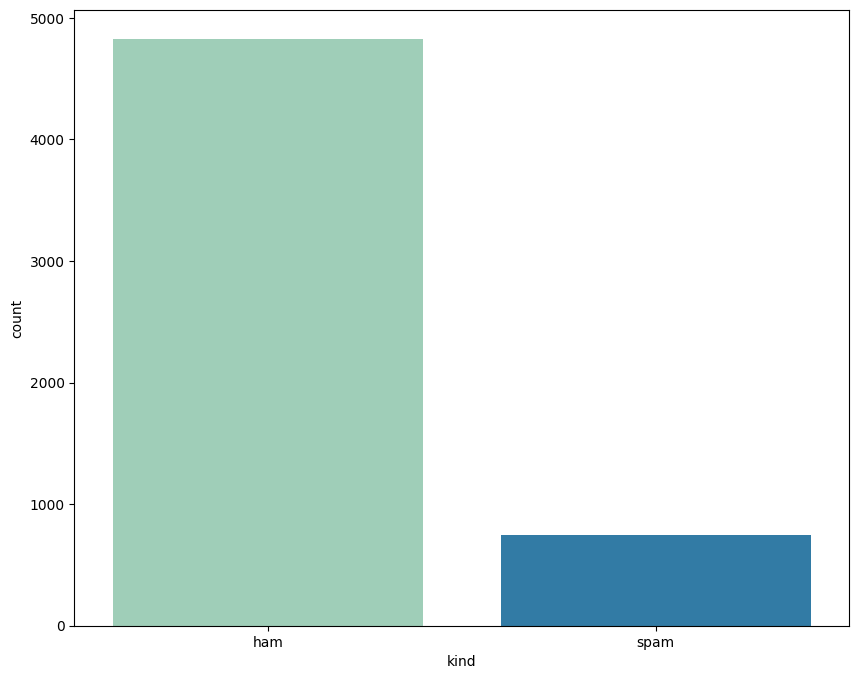

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x="kind", data=df, palette="YlGnBu")
plt.show()

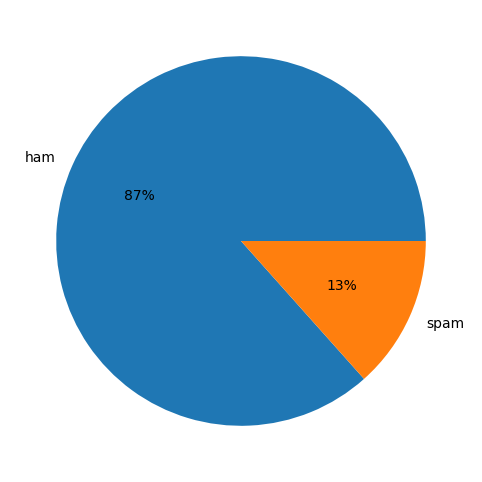

In [ ]:
plt.figure(figsize=(8, 6))
kind_counts = df["kind"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
model.score(X_train,Y_train)

0.9694862014808167

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9587443946188341
